# OSMOSIS 2019 

Topic: Movie Poster To Genre


In [1]:
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
import requests

movies = pd.read_csv("./MovieGenre.csv", encoding="ISO-8859-1")

#print(movies.columns)
#print(str(movies[movies["imdbId"] == int(img_id)]["Genre"].values[0]).split("|"))

length = len(movies)
print("Total Number Of Movies:" + str(length))


#try:
#    os.makedirs("/Movie_Posters")
#except OSError:
#    print("Creation of path failed")
#else:
#    print("Folder successfully created!")

#for i in range(0, length+1):
#   try:
#        img_data = requests.get(movies.loc[i]['Poster']).content
#    except:
#        print('No URL Provided')
#    else:
#        img_name = './Movie_Posters/' +str(movies.loc[i]['imdbId'])+'.jpg'
#        print(str(i)+" "+"Saving Image" + img_name)
#        with open(img_name, 'wb') as handler:
#            handler.write(img_data)

#print(movies.loc[1]['Title'])


Total Number Of Movies:40108


#### The First 10 records fetched using pandas with their corresponding posters.

In [2]:
for i in range(0, 10):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

0 imdbId                                                   114709
Imdb Link                    http://www.imdb.com/title/tt114709
Title                                          Toy Story (1995)
IMDB Score                                                  8.3
Genre                                Animation|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 0, dtype: object
0 Saving Image./Posters_Checkpoint1/114709.jpg

1 imdbId                                                   113497
Imdb Link                    http://www.imdb.com/title/tt113497
Title                                            Jumanji (1995)
IMDB Score                                                  6.9
Genre                                   Action|Adventure|Family
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 1, dtype: object
1 Saving Image./Posters_Checkpoint1/113497.jpg

2 imdbId                                                   113228
Imdb Link           

#### The Last 10 records fetched using pandas with their corresponding posters.

In [3]:
for i in range(length-10, length):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

40098 imdbId                                                   229480
Imdb Link                    http://www.imdb.com/title/tt229480
Title                                    Island of Blood (1982)
IMDB Score                                                  4.7
Genre                                   Horror|Mystery|Thriller
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40098, dtype: object
40098 Saving Image./Posters_Checkpoint1/229480.jpg

40099 imdbId                                                    93991
Imdb Link                     http://www.imdb.com/title/tt93991
Title                   Slave Girls from Beyond Infinity (1987)
IMDB Score                                                  4.5
Genre                                   Action|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40099, dtype: object
40099 Saving Image./Posters_Checkpoint1/93991.jpg

40100 imdbId                                                   

#### Next We will Analyse the Data Distribution

In [2]:
genre_list = []
mov_mul_genre = []

for n in range(0, length):
    genres = str(movies.loc[n]['Genre'])
    if '|' in genres:
        mov_mul_genre.append(str(movies.loc[n]['Title']))
    genres_l = genres.split('|')
    genre_list.extend(genres_l)
    
unique_genres = list(set(genre_list))
    
print("Total Number of Unique Genres are: " + str(len(unique_genres)))

print("Total Number of Movies With Multiple Genres: " + str(len(mov_mul_genre)))

Total Number of Unique Genres are: 29
Total Number of Movies With Multiple Genres: 29365


#### Number of movies from each genre

Comedy: 12682
Music: 1292
Adventure: 3829
nan: 145
Talk-Show: 7
Romance: 6224
Horror: 3990
Biography: 1999
Film-Noir: 403
Action: 5331
War: 1173
Thriller: 4816
Drama: 20053
History: 1426
Adult: 14
Reality-TV: 2
Crime: 5270
Musical: 845
Family: 2100
Game-Show: 1
News: 83
Sci-Fi: 2020
Mystery: 2395
Documentary: 3882
Western: 853
Fantasy: 2012
Animation: 1750
Sport: 707
Short: 1066


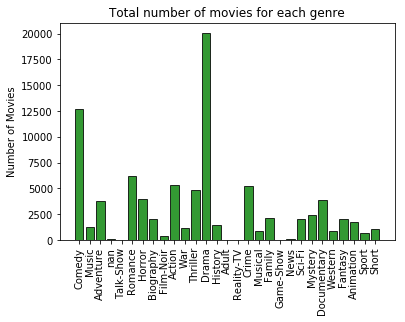

In [3]:
cnt_list = []

for gnr in unique_genres:
    cnt = genre_list.count(gnr)
    cnt_list.append(cnt)
    print(gnr + ": " + str(cnt))
    
#Creating a Bar Graph to represent the data

y_axis = np.arange(len(unique_genres))
plt.bar(y_axis, cnt_list, align='center', alpha=0.8, color='green', edgecolor='black')
plt.xticks(y_axis, unique_genres, rotation='vertical')
plt.ylabel('Number of Movies')
plt.title('Total number of movies for each genre')
plt.show()

## Processing and storing the data

In [4]:
import os
import glob
from sklearn.preprocessing import MultiLabelBinarizer
import cv2
import sys
import pickle

gen_accepted = ['Drama', 'Action', 'Comedy', 'Romance', 'Crime', 'Thriller', 'Horror', 'Documentary']
img_paths = glob.glob("./Movie_Posters/*.jpg")
img_ids = []
y = []
x = []
classes = tuple()

for path in img_paths:
    try:
        image = cv2.imread(path)
        (b, g, r)=cv2.split(image)
        image=cv2.merge([r,g,b])
        #for image ids
        start = path.rfind("/")+1
        end = len(path)-4
        #img_genres = tuple((movies[movies["imdbId"] == int(path[start:end])]["Genre"].values[0]).split("|"))
        img_gens = str(movies[movies["imdbId"] == int(path[start:end])]["Genre"].values[0]).split("|")
    except:
        #print("\r"+"Error in reading image!")
        sys.stdout.write("\r"+"Error in reading image!" + path)
        sys.stdout.flush()
    else:
        image = cv2.resize(image, (150, 150))
        image = image.astype(np.float32)
        
        ##For Y label
        img_genf = []
        for img_gen in img_gens:
            if img_gen in gen_accepted:
                img_genf.append(img_gen)
        if len(img_genf) !=0:
            x.append(image)
            img_genres = tuple(img_genf)
            y.append(img_genres)
            classes = classes + img_genres
        #img_ids.append(path[start:end])

x = np.asarray(x)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
#y = mlb.transform(y)
classes = set(classes)
#print(x)

#saving the dataset
pickle_dataset = open("X.pickle", "wb")
pickle.dump(x, pickle_dataset, protocol=4)
pickle_dataset.close()

pickle_dataset = open("y.pickle", "wb")
pickle.dump(y, pickle_dataset, protocol=4)
pickle_dataset.close()


Error in reading image!./Movie_Posters/23911.jpggg[('Drama',), ('Comedy',), ('Documentary',), ('Horror',), ('Comedy',), ('Action',), ('Drama', 'Thriller'), ('Drama', 'Thriller'), ('Comedy', 'Romance'), ('Comedy', 'Drama', 'Romance'), ('Comedy', 'Romance', 'Drama'), ('Comedy',), ('Drama', 'Romance'), ('Action',), ('Action', 'Horror'), ('Comedy', 'Drama', 'Romance'), ('Action', 'Comedy', 'Drama'), ('Comedy', 'Crime', 'Thriller'), ('Crime', 'Romance', 'Thriller'), ('Crime', 'Drama'), ('Documentary',), ('Comedy',), ('Drama', 'Romance'), ('Drama', 'Romance'), ('Comedy', 'Crime'), ('Drama',), ('Action', 'Crime'), ('Documentary',), ('Action', 'Drama'), ('Action',), ('Comedy',), ('Drama',), ('Comedy', 'Drama'), ('Drama',), ('Comedy', 'Crime'), ('Action', 'Crime', 'Thriller'), ('Documentary',), ('Action', 'Drama'), ('Crime', 'Drama'), ('Comedy', 'Drama'), ('Comedy', 'Romance'), ('Action', 'Drama', 'Thriller'), ('Horror', 'Thriller'), ('Comedy',), ('Crime', 'Drama'), ('Documentary',), ('Document

## Writing the Layers 

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle

pickle_dataset = open("X.pickle", "rb")
X = pickle.load(pickle_dataset)

pickle_dataset = open("y.pickle", "rb")
y = pickle.load(pickle_dataset)

X = X/255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.RMSprop(lr=0.001)

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, shuffle = True)



ValueError: Unknown loss function:sigmoid_cross_entropy_with_logits

In [11]:
print(classes)

{'Crime', 'Documentary', 'Drama', 'Action', 'Romance', 'Horror', 'Comedy', 'Thriller'}


In [4]:
model.save('mov_poster_2')


In [5]:
print(y)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [17]:
import tensorflow as tf
def test_img(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array=np.expand_dims(new_array, axis=0)
    new_array = new_array.astype(np.float32)
    return new_array

model_p = tf.keras.models.load_model("mov_poster_1")

prediction = model_p.predict([test_img('./Posters_Checkpoint1/114576.jpg')])

print(prediction)

[[0. 0. 0. 0. 1. 0. 0. 0.]]


In [9]:
import tensorflow as tf
import cv2
import glob
def test_img2(filepath):
    filepaths = glob.glob(filepath)
    IMG_SIZE = 150
    img = []
    for filepat in filepaths:
        img_array = cv2.imread(filepat)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array = new_array.astype(np.float32)
        img.append(new_array)
    return np.asarray(img)

model_p = tf.keras.models.load_model("mov_poster_1")

prediction = model_p.predict_classes([test_img2('./Posters_Checkpoint1/*.jpg')])

print(prediction)

[1 1 1 4 1 7 1 3 1 1 1 0 4 1 3 4 1]
